# Lesson 1
## Reading and Writing Data

In [2]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

In [3]:
%matplotlib inline

In [4]:
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']
births = [968, 155, 77, 578, 973]

In [6]:
BabyDataSet = list(zip(names, births))

In [7]:
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [8]:
df = pd.DataFrame(BabyDataSet, columns=['Names', 'Births'])

In [9]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [10]:
df.to_csv('births1880.csv', index=False, header=False)

In [13]:
pwd births1880.csv

'/Users/kuhlryan/Repo/pydata101/pandas'

In [14]:
loc = r'/Users/kuhlryan/Repo/pydata101/pandas/births1880.csv'

In [18]:
df = pd.read_csv(loc, names=['Names', 'Births'])

In [19]:
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [22]:
import os; os.remove(loc)

Check the datatypes of the data in the dataframs. Can also be used as df.{col}.dtypes to check a specific col

In [23]:
df.dtypes

Names     object
Births     int64
dtype: object

In [24]:
df.Births.dtypes

dtype('int64')

## Analyzing Data

In [26]:
df.sort_values(['Births'], ascending=False).head(1)

,Names,Births
4,Mel,973


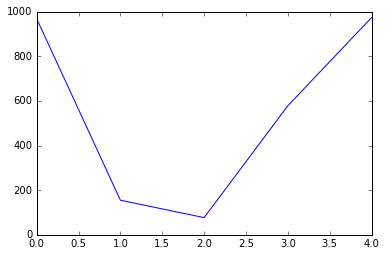

In [28]:
df['Births'].plot()

# Lesson 2

In [30]:
import random

In [36]:
names = ['Bob','Jessica','Mary','John','Mel']

In [34]:
random.seed(500)

In [39]:
random_names = [names[random.randint(0, len(names))] for i in range(1000)]

IndexError: list index out of range

In [66]:
random_names = [names[random.randint(0, len(names)-1)] for i in range (1000)]

In [67]:
random_births = [random.randint(0, 1000) for i in range(1000)]

In [68]:
BabyDataSet = list(zip(random_names, random_births))

In [69]:
BabyDataSet[:10]

[('Jessica', 512),
 ('Mel', 947),
 ('John', 83),
 ('John', 966),
 ('Jessica', 985),
 ('Jessica', 145),
 ('Mel', 546),
 ('Mary', 845),
 ('Bob', 92),
 ('Mary', 38)]

In [72]:
df = pd.DataFrame(BabyDataSet, index=None, columns=['Name', 'Births'])

In [75]:
df.sort_values('Births', ascending=False)

,Name,Births
168,John,1000
197,John,998
224,Bob,997
572,Mary,997
791,Mary,993
91,Jessica,991
381,Bob,991
945,Mel,988
759,Mary,987
544,Bob,987


In [81]:
names = df.groupby('Name')

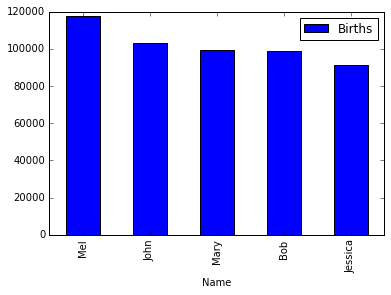

In [85]:
names.sum().sort_values('Births', ascending=False).plot.bar()

# Lesson 3
## Create Data I/O with Excel

In [86]:
import numpy as np
import sys

In [87]:
np.random.seed(111)

In [90]:
def CreateDataSet(Number=1):
    output = []
    for i in range(Number):
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        data = np.random.randint(25, 1000, size=len(rng))
        status = [1, 2, 3]
        random_status = [status[np.random.randint(0, len(status)-1)] for i in range(len(rng))]
        states = ['GA', 'FL', 'NY', 'NJ', 'TX', 'VA']
        random_states = [states[np.random.randint(0, len(states)-1)] for i in range(len(rng))]
        output.extend(zip(random_states, random_status, data, rng))
    return output

In [92]:
CreateDataSet(4)

[('NJ', 1, 219, Timestamp('2009-01-05 00:00:00', offset='W-MON')),
 ('FL', 1, 582, Timestamp('2009-01-12 00:00:00', offset='W-MON')),
 ('TX', 2, 383, Timestamp('2009-01-19 00:00:00', offset='W-MON')),
 ('GA', 2, 549, Timestamp('2009-01-26 00:00:00', offset='W-MON')),
 ('FL', 1, 958, Timestamp('2009-02-02 00:00:00', offset='W-MON')),
 ('NY', 1, 84, Timestamp('2009-02-09 00:00:00', offset='W-MON')),
 ('GA', 2, 610, Timestamp('2009-02-16 00:00:00', offset='W-MON')),
 ('NY', 1, 451, Timestamp('2009-02-23 00:00:00', offset='W-MON')),
 ('NY', 2, 181, Timestamp('2009-03-02 00:00:00', offset='W-MON')),
 ('TX', 2, 352, Timestamp('2009-03-09 00:00:00', offset='W-MON')),
 ('NY', 2, 942, Timestamp('2009-03-16 00:00:00', offset='W-MON')),
 ('TX', 1, 543, Timestamp('2009-03-23 00:00:00', offset='W-MON')),
 ('NJ', 2, 112, Timestamp('2009-03-30 00:00:00', offset='W-MON')),
 ('NY', 2, 827, Timestamp('2009-04-06 00:00:00', offset='W-MON')),
 ('GA', 1, 859, Timestamp('2009-04-13 00:00:00', offset='W-MON'